In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_csv('./Dacon_smoking/train.csv')

#흡연 여부 1:흡연, 0:비흡연
X=train.drop('label',axis=1)
y=train['label']
# 훈련 과정중에 모델의 성능을 평가하는 val set 
# 하이퍼파라미터 튜닝, 조기 종료에 사용, 절대 학습에는 사용하지 않음
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

display(X_train.head(3))
display(X_train.shape)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
1612,TRAIN_1612,55,145,45,21.40,0.90,0,95,46,88,0.8,318,93,207,13.5,1,1.14
978,TRAIN_0978,55,160,55,21.48,0.50,0,94,42,107,0.7,207,104,81,14.6,1,1.15
3050,TRAIN_3050,40,170,60,20.76,1.35,0,102,28,230,1.0,243,40,157,16.0,1,1.60


(4900, 17)

DBSCAN(Density-based spatial clustering of applications with noise)을 활용

각 데이터 포인트 주변에 epsilon(엡실론) 반경의 원을 형성하고, 이를 기반으로 데이터 포인트를 핵심(Core) 포인트, 경계(Border) 포인트, 노이즈(Noise) 포인트 로 분류

이때 고려해야 하는 두 가지 주요 매개변수는 epsilon(엡실론)과 minPoints(최소 데이터 포인트 수)
- 엡실론: 각 데이터 포인트 주변에 형성되는 원의 반경
- minPoints: 해당 원 내부에 존재해야하는 최소 데이터 포인트 수

'공복 혈당'과 '중성 지방' 두 변수에 대한 산점도 생성
두 변수의 관계를 시각화

/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.

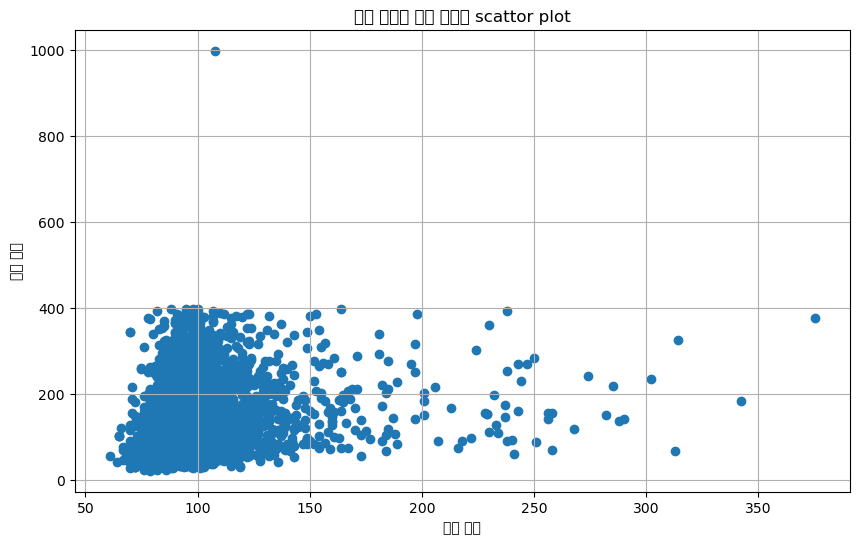

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_train['공복 혈당'],X_train['중성 지방'])

plt.title('공복 혈당과 중성 지방의 scattor plot')
plt.xlabel('공복 혈당')
plt.ylabel('중성 지방')
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

DBSCAN_train = X_train.copy()
numeric_columns = ['공복 혈당','중성 지방']
# '공복 혈당', '중성 지방' 열만 선택해서 data_numeric으로 만듬
data_numeric = DBSCAN_train[numeric_columns]
# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
#서로 다른 단위를 가진 특성들을 비교 가능하게 만들기 위해 필요
db = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
labels = db.labels_
#labels_ : 각 데이터가 속한 클러스터 번호
pd.Series(labels).value_counts()




 0    4839
-1      42
 1      14
 2       5
Name: count, dtype: int64

/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.

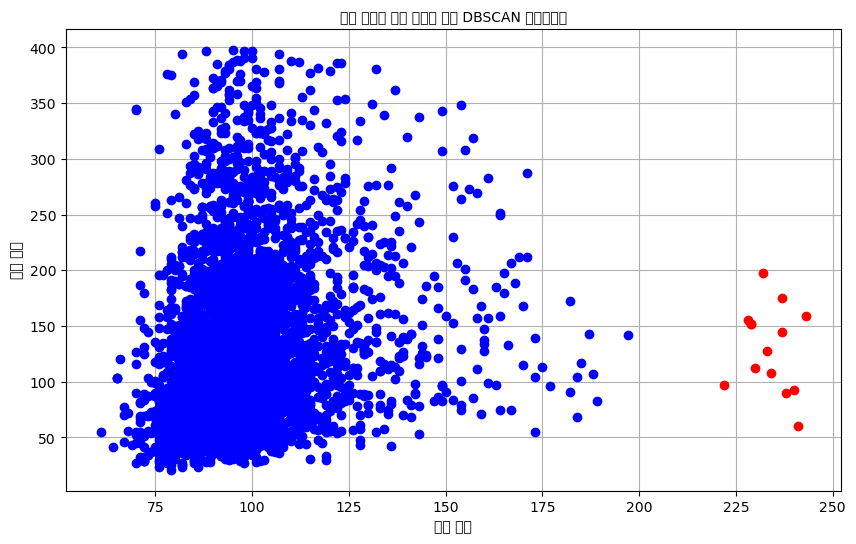

In [5]:
plt.figure(figsize=(10,6))

unique_labels = set(labels)
colors = ['blue', 'red']

for color, label in zip(colors, unique_labels):
    sample_mask = labels == label
    plt.plot(data_numeric.iloc[sample_mask, 0], data_numeric.iloc[sample_mask, 1], 'o', color=color)

# x축과 y축에 라벨 추가
plt.xlabel('공복 혈당', fontsize=10)
plt.ylabel('중성 지방', fontsize=10)

plt.title('공복 혈당과 중성 지방에 대한 DBSCAN 클러스터링', fontsize=10)
plt.grid(True)
plt.show()

DBSCAN 클러스터링을 통한 이상치 제거 결과
- data_scaled에 DBSCAN 클러스터링을 적용

In [7]:
clusters_sample = db.fit_predict(data_scaled)

DBSCAN_train['clusters'] = clusters_sample
sample_no_outliers = DBSCAN_train[DBSCAN_train['clusters']!=-1]

display(sample_no_outliers.head(3))
display(f"이상치가 아닌 데이터 포인트들의 수: {len(sample_no_outliers)}")

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,clusters
1612,TRAIN_1612,55,145,45,21.40,0.90,0,95,46,88,0.8,318,93,207,13.5,1,1.14,0
978,TRAIN_0978,55,160,55,21.48,0.50,0,94,42,107,0.7,207,104,81,14.6,1,1.15,0
3050,TRAIN_3050,40,170,60,20.76,1.35,0,102,28,230,1.0,243,40,157,16.0,1,1.60,0


'이상치가 아닌 데이터 포인트들의 수: 4858'

/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chonac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.

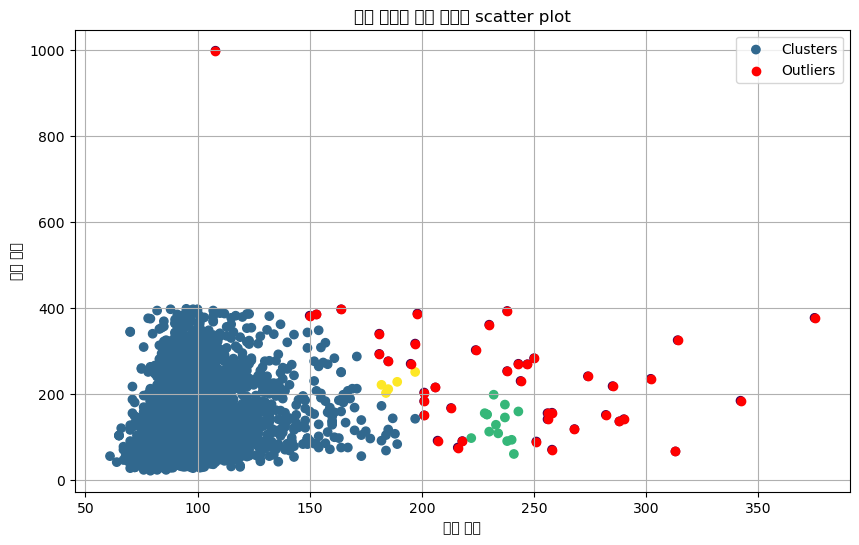

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(DBSCAN_train['공복 혈당'], DBSCAN_train['중성 지방'], c=DBSCAN_train['clusters'], cmap='viridis', label='Clusters')
plt.scatter(DBSCAN_train[DBSCAN_train['clusters'] == -1]['공복 혈당'], 
            DBSCAN_train[DBSCAN_train['clusters'] == -1]['중성 지방'], 
            color='red', label='Outliers')

plt.title('공복 혈당과 중성 지방의 scatter plot')
plt.xlabel('공복 혈당')
plt.ylabel('중성 지방')
plt.legend()
plt.grid(True)
plt.show()